<a href="https://colab.research.google.com/github/zacherymoy/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DSPT3_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
import pandas as pd

In [0]:
#Rename
cols = ['Class Name', 'Handicapped Infants', 'Water Project Cost Sharing', 'Adoption of the Budget Resolution', 'Physician Fee Freeze', 
        'El Salvador Aid', 'Religious Groups in Schools', 'Anti Satellite Test Ban', 'Aid to Nicaraguan Contras', 'mx missile', 
       'immigration', 'Synfuels Corporation Cutback', 'Education Spending', 'Superfund Right to Sue', 'Crime', 'Duty Free Exports', 
       'Export Administration Act South Africa']
gov_data = pd.read_csv(data_url, header=None, names=cols)
gov_data.head()

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nicaraguan Contras,mx missile,immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
budget = gov_data[gov_data['Adoption of the Budget Resolution'] != '?']

In [0]:
budget['Adoption of the Budget Resolution'].replace('y', 1, inplace=True)
budget['Adoption of the Budget Resolution'].replace('n', 0, inplace=True)
budget.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nicaraguan Contras,mx missile,immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,n,y,0,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,0,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,1,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,1,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,1,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
budget.shape

(424, 17)

In [0]:
budget.describe()

,Adoption of the Budget Resolution
count,424.000000
mean,0.596698
std,0.491140
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [0]:
#Democrats Sequencing
narrowedDems2 = budget[budget['Class Name'] == 'democrat']
narrowedDems2.shape

(260, 17)

In [0]:
#Democrat Dateframe done
finalnarrowedDems2 = narrowedDems2['Adoption of the Budget Resolution']
finalnarrowedDems2.head()

2    1
3    1
4    1
5    1
6    0
Name: Adoption of the Budget Resolution, dtype: int64

In [0]:
#Republicans Sequencing
narrowedReps2 = budget[budget['Class Name'] == 'republican']
narrowedReps2.head()

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nicaraguan Contras,mx missile,immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,n,y,0,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,0,y,y,y,n,n,n,n,n,y,y,y,n,?
7,republican,n,y,0,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,0,y,y,y,n,n,n,n,n,y,y,y,n,y
10,republican,n,y,0,y,y,n,n,n,n,n,?,?,y,y,n,n


In [0]:
#Republican Dateframe done
finalnarrowedReps2 = narrowedReps2['Adoption of the Budget Resolution']
finalnarrowedReps2.shape

(164,)

In [0]:
pd.crosstab(budget['Class Name'], budget['Adoption of the Budget Resolution'])

Adoption of the Budget Resolution,0,1
Class Name,,
democrat,29,231
republican,142,22


In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import numpy as np

In [0]:
ttest_ind(finalnarrowedReps2, finalnarrowedDems2)

Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795405602e-77)

## Generate and numerically represent a confidence interval

In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

In [0]:
#Democrats = 260 total

sample_size = 260
sample = finalnarrowedDems2.sample(sample_size)
sample.head()

153    1
193    1
172    1
418    1
367    1
Name: Adoption of the Budget Resolution, dtype: int64

In [0]:
sample_mean = sample.mean()
sample_std = np.std(sample, ddof=1)
print(sample_mean, sample_std)

0.8884615384615384 0.3154048976795525


In [0]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.019560581385909874

In [0]:
t = 1.984 # 95% confidence
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)

(0.8884615384615384, 0.8496533449918933, 0.9272697319311836)

In [0]:
confidence_interval(sample, confidence=0.95)

(0.8884615384615384, 0.8499435153340716, 0.9269795615890052)

## Republicans confidence level

In [0]:
#Republicans = 164 total

sample_size1 = 164
sample1 = finalnarrowedReps2.sample(sample_size1)
sample1.head()

126    0
433    0
146    0
38     0
405    0
Name: Adoption of the Budget Resolution, dtype: int64

In [0]:
sample_mean1 = sample1.mean()
sample_std1 = np.std(sample1, ddof=1)
print(sample_mean1, sample_std1)

0.13414634146341464 0.34185330768366606


In [0]:
standard_error1 = sample_std1/np.sqrt(sample_size1)
standard_error1

0.026694258537510625

In [0]:
t = 1.984 # 95% confidence
(sample_mean1, sample_mean1 - t*standard_error1, sample_mean1 + t*standard_error1)

(0.13414634146341464, 0.08118493252499356, 0.18710775040183572)

In [0]:
confidence_interval(sample1, confidence=0.95)

(0.13414634146341464, 0.08143520131697565, 0.18685748160985363)

## Graphically (with a plot) represent the confidence interval

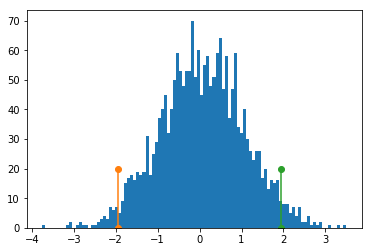

In [0]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

s= np.random.normal(0,1,2000)


plt.figure()
_ = plt.hist(s,  bins=100)

plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o');

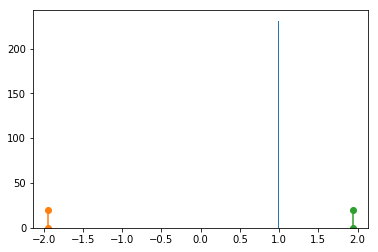

In [0]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

plt.figure()
_ = plt.hist(sample,  bins=100)

plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o');

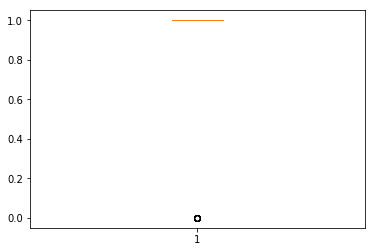

In [0]:
plt.boxplot(sample);

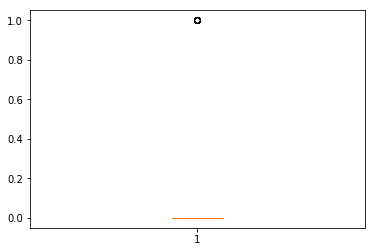

In [0]:
plt.boxplot(sample1);

## Interpret the confidence interval - what does it tell you about the data and its distribution?

95% of the sample Democrat population would be between 84-92% approval for budget proposal. 


___________
95% of the Republican sample population from the range of 8-18% would approve of the budget proposal. 

## Chi-Squared tests

Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data


*   By hand using numpy
*   In a single line using Scipy





In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [0]:
df.head(10)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"
5,1999,actor,1/19/99,Acting,William Baldwin,"Acting, Comedy & Music"
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe,"Acting, Comedy & Music"
7,1999,model,1/21/99,Media,Carmen Electra,Media
8,1999,actor,1/25/99,Acting,Matthew Lillard,"Acting, Comedy & Music"
9,1999,stand-up comedian,1/26/99,Comedy,David Cross,"Acting, Comedy & Music"


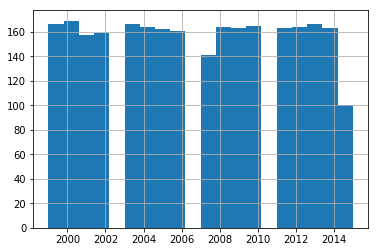

In [0]:
df['Year'].hist(bins=20);

In [0]:
df.describe(exclude='number')

,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
count,2667,2693,2662,2693,2693
unique,398,2639,17,1669,4
top,actor,2/10/99,Acting,Fareed Zakaria,"Acting, Comedy & Music"
freq,596,3,930,19,1203


In [0]:
df['Occupation'].value_counts()

Acting, Comedy & Music     1203
Media                       756
Government and Politics     384
Other                       350
Name: Occupation, dtype: int64

In [0]:
df = df.sort_values(by='Year')
# https://github.com/pandas-dev/pandas/issues/25278
contingency_table = pd.crosstab(df['Occupation'], df['Year'], margins=True)
contingency_table

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,All
Occupation,,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",150,125,114,99,93,63,60,58,36,34,34,58,55,44,71,64,45,1203
Government and Politics,2,14,6,11,17,37,26,31,24,33,34,30,27,33,21,21,17,384
Media,11,21,31,42,41,45,54,47,47,77,59,50,51,52,51,53,24,756
Other,3,9,6,7,15,19,22,25,34,20,36,27,30,35,23,25,14,350
All,166,169,157,159,166,164,162,161,141,164,163,165,163,164,166,163,100,2693


In class example

In [0]:
cut_points = [0, 9, 19, 29, 39, 49, 500]
label_names = ['0-9','10-19','20-29','30-39','40-49','50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df['hours_per_week_categories'].value_counts()

In [0]:
df = df.sort_values(by='hours_per_week_categories')
# https://github.com/pandas-dev/pandas/issues/25278
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)
contingency_table

Run a  χ2  Test using Scipy

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)